#### Let's have some fun with replicating uncertainties. We have thickness maps of individual glaciers provided by Farinotti et al. 2019, however, we do not know how they compute uncertainties. We have vague instructions from Millan, so we will follow those. This is a quick and dirty example calculation, not precise by nature.
#### Grab a random medium-sized glacier, RGI60-02.04403

In [1]:
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
from pyproj import Transformer
import pandas as pd

Text(0.5, 1.0, 'RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = 64917\n$\\mu$ = 122.0 m\nSurface Area $\\approx 40$ km$^2$')

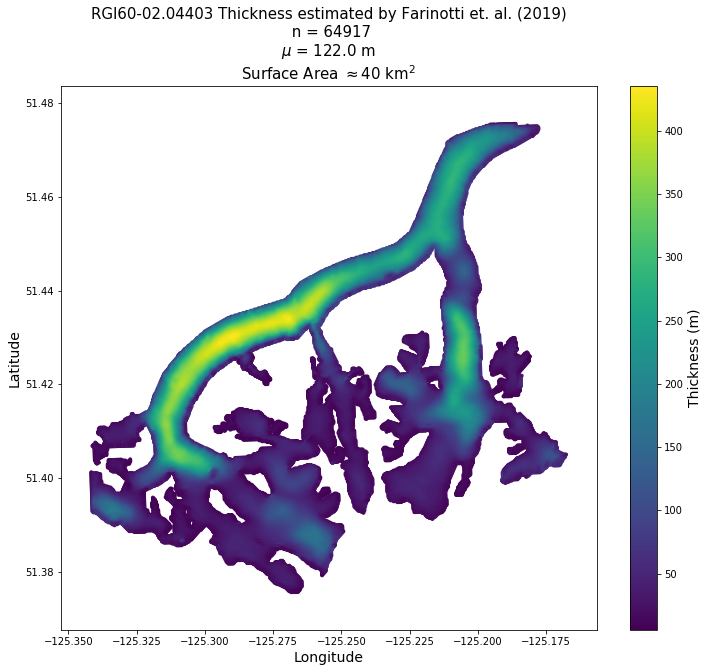

In [2]:
file_name = 'RGI60-02.04403_thickness.tif'
with rio.open(file_name) as src:
            thickness = src.read(1)
            height = thickness.shape[0]
            width = thickness.shape[1]
            cols, rows = np.meshgrid(np.arange(width), np.arange(height))
            xs, ys = rio.transform.xy(src.transform, rows, cols)
            lons= np.array(xs)
            lats = np.array(ys)
            
            

thickness[thickness == 0] = 'nan'

transformer = Transformer.from_crs("WGS 84 / UTM zone 10N", "EPSG:4326")
lons, lats = transformer.transform(lons,lats)
# something gets scrambled here, reassign lat/lon
long = lats
lat = lons

fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = thickness, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          '$\mu$ = ' + str(np.round(np.mean(np.unique(thickness[~np.isnan(thickness)])),0)) + ' m\n' + 
          r'Surface Area $\approx 40$ km$^2$',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

#### Okay, Millan says " On average, errors for ice thickness greater than 100 m are in the range of 25–35%. For ice thicknesses below 100 m, we assume error >50%." So let's do that

In [3]:
t = np.where(thickness > 100, thickness * 0.3, thickness)
t = np.where(thickness < 100, thickness * 0.5, t)

/home/simonhans/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/simonhans/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


Text(0.5, 1.0, 'RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = 64917\n$\\bar{\\sigma}^2$ = 51.0 m$^2$\nSurface Area $\\approx 40$ km$^2$')

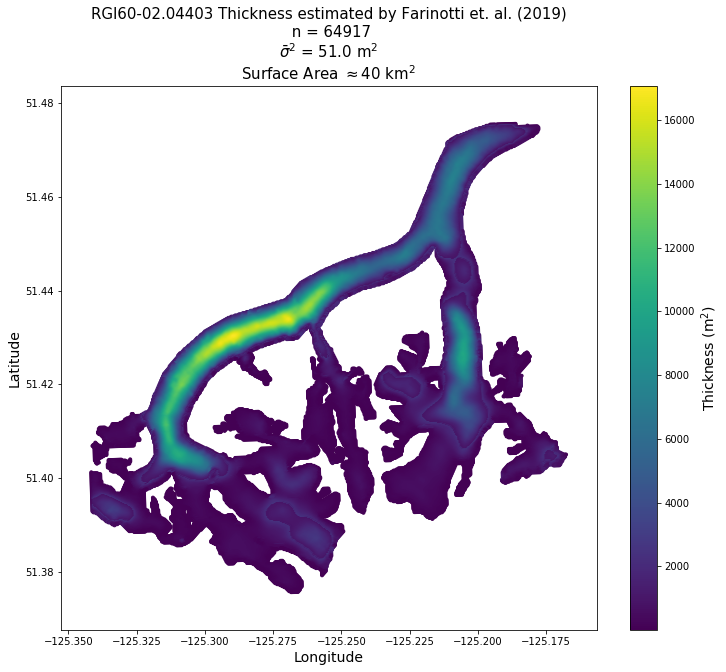

In [4]:
fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = t**2, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m$^2$)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-02.04403 Thickness estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          r'$\bar{\sigma}^2$ = ' + str(np.round(np.sqrt(np.mean(np.unique(t[~np.isnan(t)]**2))),0)) + ' m$^2$\n' +
        r'Surface Area $\approx 40$ km$^2$',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

#### Note the change in the scale!

In [5]:
unc = np.round(np.sqrt(np.nanmean(t**2)) / np.nanmean(thickness) * 100,3)
print(f'Random medium glacier has {unc}% uncertainty in mean thickness')

Random medium glacier has 41.93% uncertainty in mean thickness


#### Hm.. What is our uncertainty for this glacier? That princess is in another castle.

### How does that translate to volume? Same, it's scaled by a constant. I wonder if they considered area uncertainty?

In [6]:
unc = np.round(np.sqrt(np.nanmean(t**2)) / np.nanmean(thickness) * 100,3)
print(f'Random glacier has {unc}% uncertainty in mean thickness')


vol = np.nanmean(thickness)/1e3 * 7538
v_unc = np.sqrt(np.nanmean((t/1e3)**2)) * 7538
perc_unc = v_unc / vol * 100
print(f'Random glacier has {np.round(perc_unc,2)}% uncertainty of volume')

Random glacier has 41.93% uncertainty in mean thickness
Random glacier has 41.93% uncertainty of volume


#### okay, mean thickness uncertainty of about 42%. Let's try a bigger glacier.

Text(0.5, 1.0, 'RGI60-05.10315 Thickness estimated by Farinotti et. al. (2019)\n n = 187108\n$\\mu$ = 479.0 m\nSurface Area $\\approx 7538$ km$^2$')

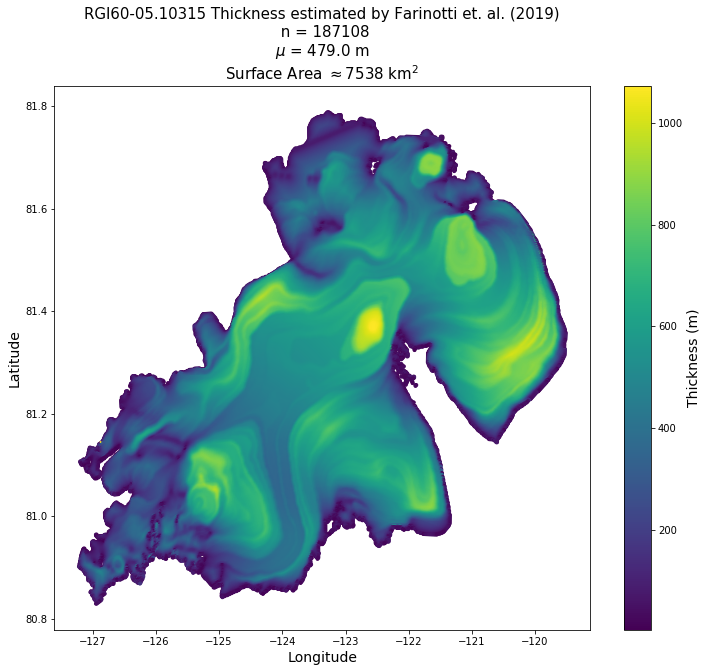

In [7]:
file_name = 'RGI60-05.10315_thickness.tif'
with rio.open(file_name) as src:
            thickness = src.read(1)
            height = thickness.shape[0]
            width = thickness.shape[1]
            cols, rows = np.meshgrid(np.arange(width), np.arange(height))
            xs, ys = rio.transform.xy(src.transform, rows, cols)
            lons= np.array(xs)
            lats = np.array(ys)
thickness[thickness == 0] = 'nan'

transformer = Transformer.from_crs("WGS 84 / UTM zone 10N", "EPSG:4326")
lons, lats = transformer.transform(lons,lats)
# something gets scrambled here, reassign lat/lon
long = lats
lat = lons

fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = thickness, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-05.10315 Thickness estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          '$\mu$ = ' + str(np.round(np.mean(np.unique(thickness[~np.isnan(thickness)])),0)) + ' m\n' +
          r'Surface Area $\approx 7538$ km$^2$',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [8]:
t = np.where(thickness > 100, thickness * 0.3, thickness)
t = np.where(thickness < 100, thickness * 0.5, t)

/home/simonhans/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/simonhans/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


Text(0.5, 1.0, 'RGI60-05.10315 Thickness Uncertainty\n n = 187108\n$\\bar{\\sigma}^2$ = 158.0 m$^2$\nSurface Area $\\approx 7538$ km$^2$')

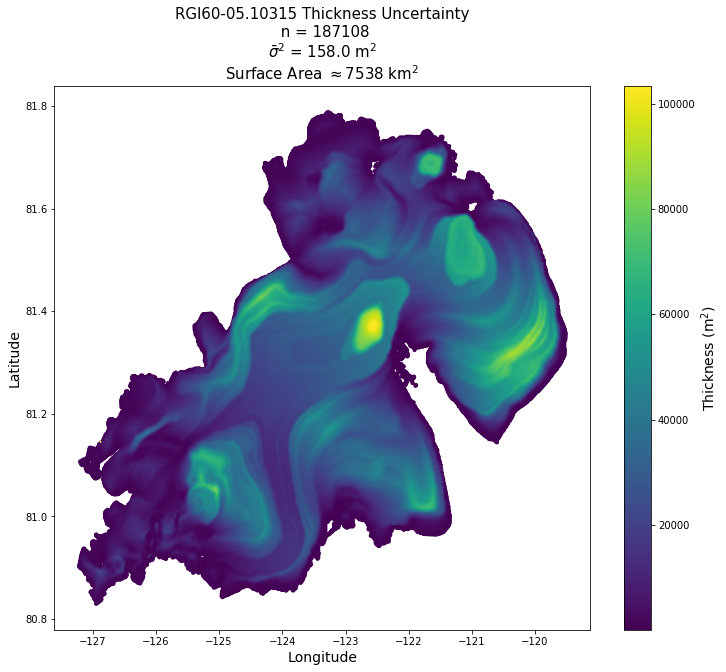

In [9]:
fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = t**2, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m$^2$)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-05.10315 Thickness Uncertainty\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          r'$\bar{\sigma}^2$ = ' + str(np.round(np.sqrt(np.mean(np.unique(t[~np.isnan(t)]**2))),0)) + ' m$^2$\n'+
          r'Surface Area $\approx 7538$ km$^2$',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

#### How does that translate to volume? We can naively calculate a volume uncertainty

In [10]:
unc = np.round(np.sqrt(np.nanmean(t**2)) / np.nanmean(thickness) * 100,3)
print(f'Largest glacier has {unc}% uncertainty in mean thickness')


vol = np.nanmean(thickness)/1e3 * 7538
v_unc = np.sqrt(np.nanmean((t/1e3)**2)) * 7538
perc_unc = v_unc / vol * 100
print(f'Flade Isblink has {np.round(perc_unc,2)}% uncertainty of volume')

Largest glacier has 32.92% uncertainty in mean thickness
Flade Isblink has 32.92% uncertainty of volume


#### The largest glacier in RGI, Flade Isblink, has about a 33% mean thickness uncertainty.  Hoo-boy. Let's try a small glacier and see what happens.

Text(0.5, 1.0, 'RGI60-19.02749 Thickness estimated by Farinotti et. al. (2019)\n n = 909\n$\\mu$ = 23.0 m\nSurface Area $\\approx 0.6$ km$^2$')

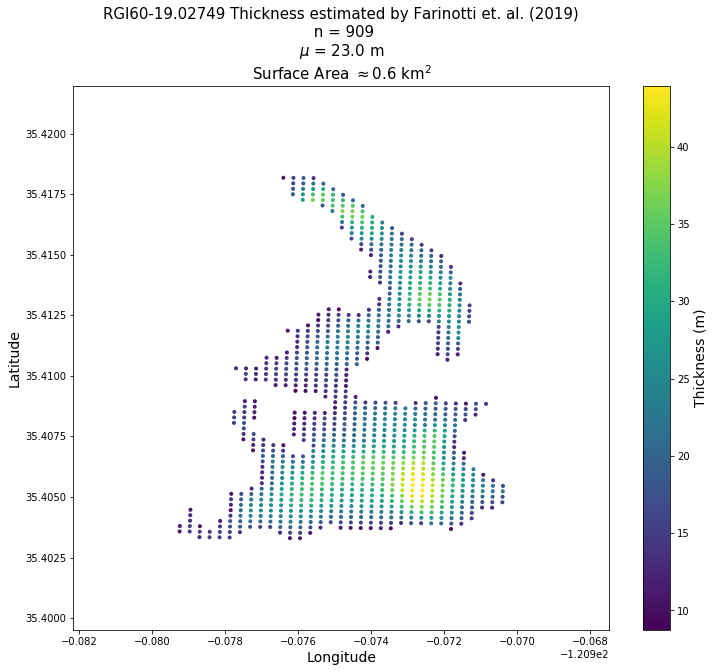

In [11]:
file_name = 'RGI60-19.02749_thickness.tif'
with rio.open(file_name) as src:
            thickness = src.read(1)
            height = thickness.shape[0]
            width = thickness.shape[1]
            cols, rows = np.meshgrid(np.arange(width), np.arange(height))
            xs, ys = rio.transform.xy(src.transform, rows, cols)
            lons= np.array(xs)
            lats = np.array(ys)
thickness[thickness == 0] = 'nan'

transformer = Transformer.from_crs("WGS 84 / UTM zone 10N", "EPSG:4326")
lons, lats = transformer.transform(lons,lats)
# something gets scrambled here, reassign lat/lon
long = lats
lat = lons

fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = thickness, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-19.02749 Thickness estimated by Farinotti et. al. (2019)\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          '$\mu$ = ' + str(np.round(np.mean(np.unique(thickness[~np.isnan(thickness)])),0)) + ' m\n' +
          r'Surface Area $\approx 0.6$ km$^2$',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [12]:
t = np.where(thickness > 100, thickness * 0.3, thickness)
t = np.where(thickness < 100, thickness * 0.5, t)

/home/simonhans/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/simonhans/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


Text(0.5, 1.0, 'RGI60-19.02749 Thickness Uncertainty\n n = 909\n$\\bar{\\sigma}^2$ = 5.0 m$^2$\nSurface Area $\\approx 0.6$ km$^2$')

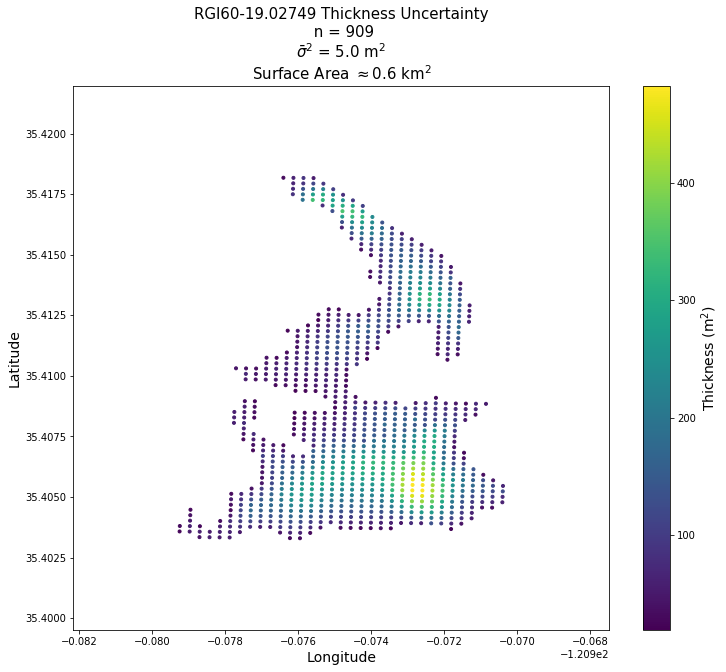

In [13]:
fig = plt.figure(figsize = (12,10))
fig.patch.set_color('w')
plt.scatter(long, lat, marker = '.', 
            c = t**2, cmap = 'viridis',
           )
fig.patch.set_color('w')
cb = plt.colorbar()
cb.set_label(label='Thickness (m$^2$)',size = 14)
plt.ylabel('Latitude',fontsize = 14)
plt.xlabel('Longitude',fontsize = 14)
plt.title('RGI60-19.02749 Thickness Uncertainty\n n = ' + 
          str(len(np.unique(thickness[~np.isnan(thickness)]).flatten()))+'\n' + 
          r'$\bar{\sigma}^2$ = ' + str(np.round(np.sqrt(np.mean(np.unique(thickness[~np.isnan(thickness)]))),0)) + ' m$^2$\n' +
          r'Surface Area $\approx 0.6$ km$^2$',
          fontsize = 15)
# plt.clim((np.nanmin(thick), np.nanmax(thick)))

In [14]:
unc = np.round(np.sqrt(np.nanmean(t**2)) / np.nanmean(thickness) * 100,3)
print(f'Random small glacier has {unc}% uncertainty in mean thickness')

Random small glacier has 52.905% uncertainty in mean thickness


#### AAAHHH 53% mean uncertainty of thickness! No wonder their uncertainty bounds are so friggen big!

#### Remember, these numbers are not to be trusted...yet